In [1]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import ipympl
import imageio.v3 as iio
import skimage.color
import skimage.filters

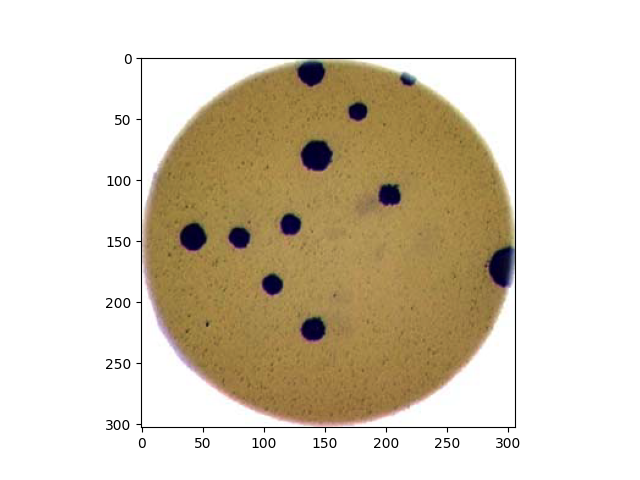

In [8]:
colonies = plt.imread('colonies-01.tif')
fig, ax = plt.subplots()
plt.imshow(colonies)

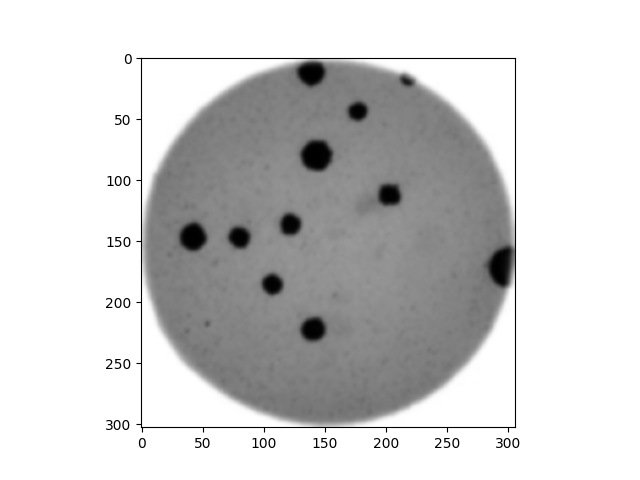

In [10]:
# Convert the image to grayscale
gray_colonies = skimage.color.rgb2gray(colonies)
# blur the image to denoise
blurred_colonies = skimage.filters.gaussian(gray_colonies, sigma=1.5)
fig, ax = plt.subplots()
plt.imshow(blurred_colonies, cmap='gray')

The bacteria looks to be darker than the background so we will have to threshold by turning pixels below 'on'.

(0.0, 1.0)

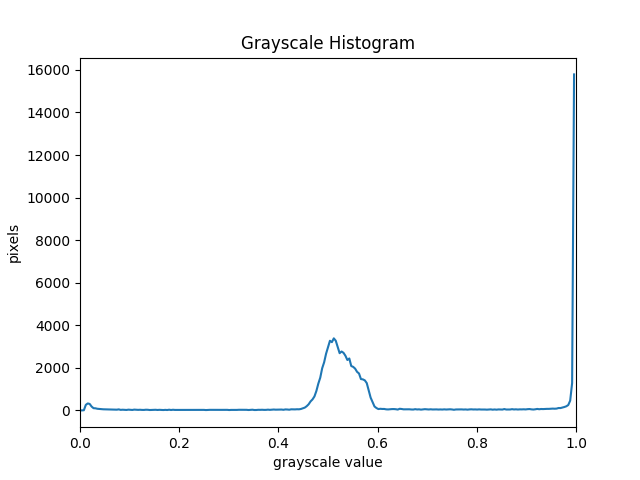

In [11]:
histogram, bin_edges = np.histogram(blurred_colonies, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)

The pixels closer to 0 represent the bacteria since they are very dark in the image. Pixels between 0.4-0.6 represent the petri dish.

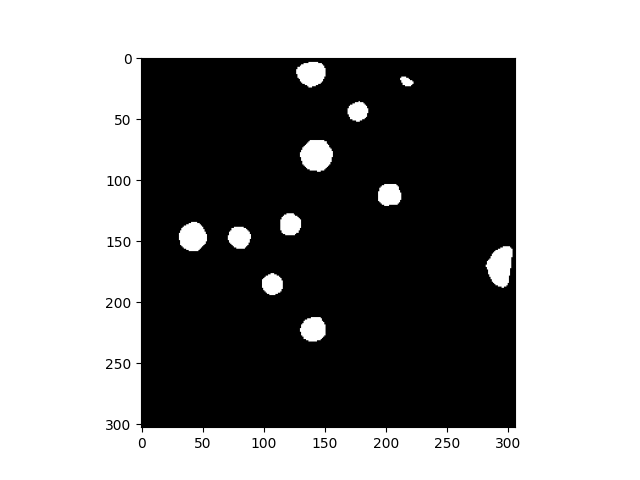

In [20]:
# create a mask based on the threshold
t = 0.35
binary_mask = blurred_colonies < t
fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')

We were able to turn 'on' the bacteria as they appear white.

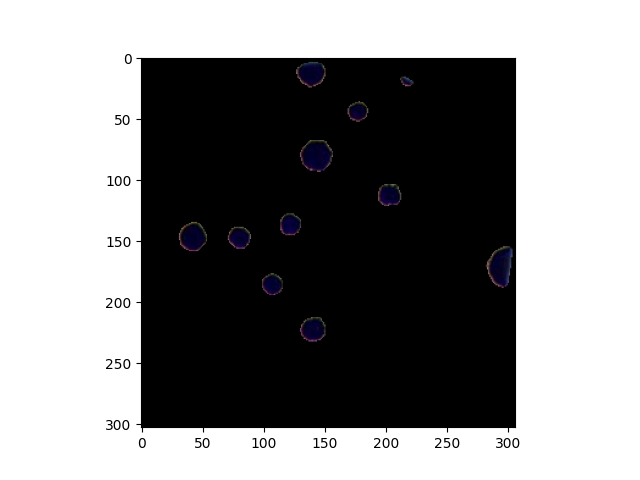

In [21]:
# use binary_mask to select the 'interesting' part of the image
selection = colonies.copy()
selection[~binary_mask] = 0
fig, ax = plt.subplots()
plt.imshow(selection)

By choosing a threshold value of 0.35, we were able to extract the bacteria from the petri dish in the background.